In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from random import randint
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
a = randint(1,10)

In [5]:
X, _ = make_blobs(n_samples = 50, n_features = 2, centers = a) #generating synthetic dataset; a is random  

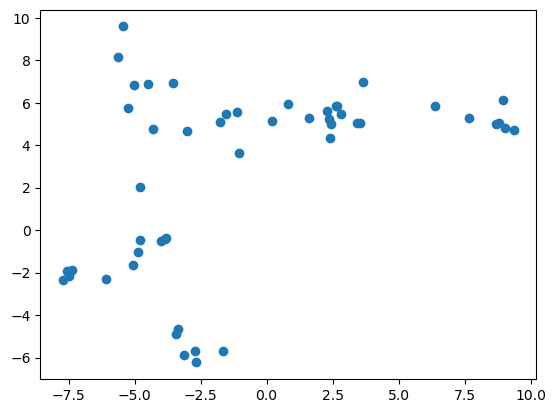

In [6]:
plt.scatter(X[:,0],X[:,1]) #X[:,0] are x coordinates and X[:,1] are y coordinates

In [7]:
wcss = []
means =[]

In [8]:
df = X[:,0],X[:,1]

In [9]:
for i in range (1,11):
    kmeans = KMeans(n_clusters = i,random_state = 10)
    kmeans.fit(X)
    wcss_temp = kmeans.inertia_
    wcss.append(wcss_temp)
    means.append(i)

C:\Users\baldd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
iterator = 1
for i in wcss:
    print(iterator,":", i)
    iterator=iterator+1

1 : 2112.3340927071554
2 : 896.9328347584849
3 : 401.57257121461527
4 : 241.07834411737394
5 : 136.43804530311007
6 : 93.08880793231684
7 : 61.23423839026856
8 : 49.92397945885882
9 : 43.25410771628977
10 : 37.6328630579882


Text(0, 0.5, 'WCSS')

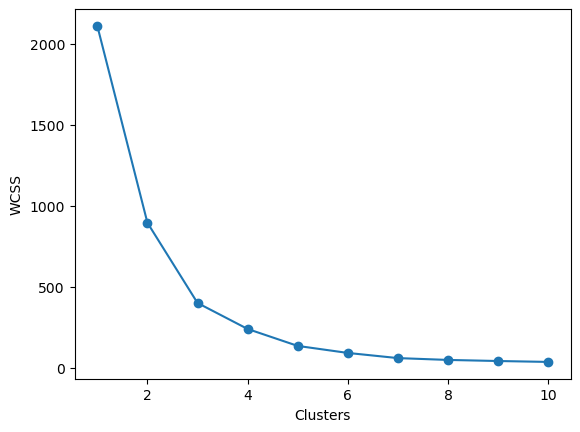

In [11]:
plt.plot(means,wcss, 'o-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')


In [12]:
silhouette_tab = []
max_silhouette = 0

In [22]:
for i in range(2,11):
    kmeans = KMeans(n_clusters = i,random_state = 10)
    kmeans.fit(X)
    silhouette = silhouette_score(X, kmeans.labels_)
    if silhouette > max_silhouette:
        max_silhouette = silhouette
    silhouette_tab.append(silhouette)
    print("Dla n_klastrów =", i," silhouette_score to: ", silhouette)

Dla n_klastrów = 2  silhouette_score to:  0.5394619206429867
Dla n_klastrów = 3  silhouette_score to:  0.5465493791217887
Dla n_klastrów = 4  silhouette_score to:  0.5994121371167036
Dla n_klastrów = 5  silhouette_score to:  0.6225500138847907
Dla n_klastrów = 6  silhouette_score to:  0.6095579979119531
Dla n_klastrów = 7  silhouette_score to:  0.6325372738837888
Dla n_klastrów = 8  silhouette_score to:  0.6216808247726401
Dla n_klastrów = 9  silhouette_score to:  0.6152995140488839
Dla n_klastrów = 10  silhouette_score to:  0.5350252513430533


In [14]:
print(max_silhouette)

0.6325372738837888


Text(0, 0.5, 'Silhouette score')

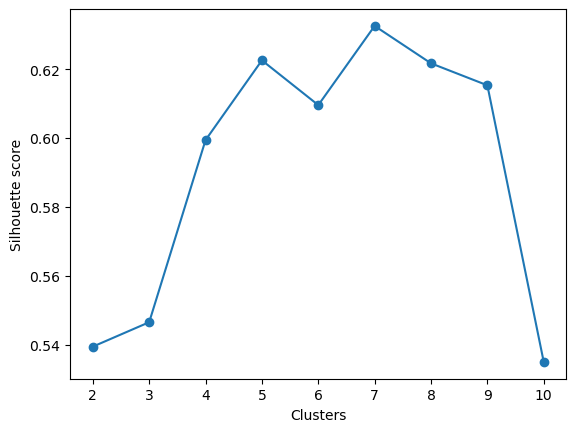

In [15]:
plt.plot(means[1:],silhouette_tab, 'o-')
plt.xlabel('Clusters')
plt.ylabel('Silhouette score')
